# Imports

In [20]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importing datasets

In [2]:
import numpy as np
import h5py
    
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, np.transpose(train_set_y_orig), test_set_x_orig, np.transpose(test_set_y_orig), classes

In [3]:
train_x, train_y, test_x, test_y, classes = load_dataset()

y = 1. It's a cat picture.


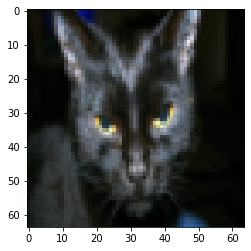

In [4]:
# Example of a picture
index = 25
plt.imshow(train_x[index])
print ("y = " + str(train_y[index,0]) + ". It's a " + classes[train_y[index,0]].decode("utf-8") +  " picture.")

In [5]:
train_y = train_y.reshape(-1)
test_y = test_y.reshape(-1)

In [6]:
print(f'Train x shape is - {train_x.shape}, Train y shape is - {train_y.shape}')
print(f'Test x shape is - {test_x.shape}, Test y shape is - {test_y.shape}')

Train x shape is - (209, 64, 64, 3), Train y shape is - (209,)
Test x shape is - (50, 64, 64, 3), Test y shape is - (50,)


# Principal component analysis

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
n_train = train_x.shape[0]
n_test = test_x.shape[0]

In [15]:
train_x = train_x.reshape(n_train,-1)
test_x = test_x.reshape(n_test,-1)
print(train_x.shape, test_x.shape)

(209, 12288) (50, 12288)


In [16]:
scaler = StandardScaler()
scaler.fit(train_x)
scaler.fit(test_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [27]:
pca = PCA(n_components=2)
train_x = pca.fit_transform(train_x)

In [34]:
pca = PCA(n_components=2)
test_x = pca.fit_transform(test_x)

In [28]:
n_points = train_x.shape[0]
distances = []
for i in range(n_points):
    point = train_x[i]
    temp_points = train_x[i+1:]
    for j in range(temp_points.shape[0]):
        dist = np.linalg.norm(point - temp_points[j])
        distances.append(dist)

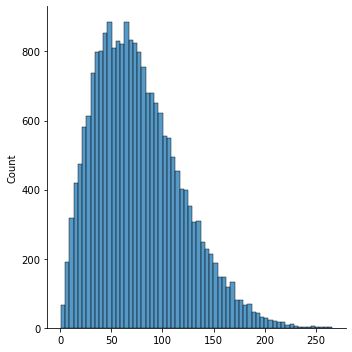

In [29]:
sns.displot(distances)

# KNN Algorithm

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

In [31]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [35]:
y_pred_knn = knn_classifier.predict(test_x)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(test_y,y_pred_knn))

              precision    recall  f1-score   support

           0       0.43      0.88      0.58        17
           1       0.87      0.39      0.54        33

    accuracy                           0.56        50
   macro avg       0.65      0.64      0.56        50
weighted avg       0.72      0.56      0.55        50

